# Hands On with Simple Linear Regression
## Goal for practice
### 1. Perform simple linear regression with SKlearn
### 2. Use model performance metrics to evaluate model performance
### 3. Perform residule diagnostic and decide proper preprocessing before fitting the model
### 4. Implement SLR with gradient descent algorithm

We have learnt Simple(SLR) Linear Regression, let's use some data to do some hands on work. The data provided is a synthesized data let's fit model with sklearn

In [1]:
! pip install scikit-learn

#### Load important library

In [2]:
import pandas as pd  
import numpy as np  
import os
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [3]:
# path="your/data/path" # this path need to change to fit your file direcotry
path = ""
data1b = "train.csv"
data1t = "test.csv"
data2b = "train2.csv"
data2t = "test2.csv"
data3b = "train3.csv"
data3t = "test3.csv"
#print(os.path.join(path, data1b))

# Read Data

In [4]:
dt1b = pd.read_csv(os.path.join(path, data1b))
dt1t = pd.read_csv(os.path.join(path, data1t))
dt2b = pd.read_csv(os.path.join(path, data2b))
dt2t = pd.read_csv(os.path.join(path, data2t))
dt3b = pd.read_csv(os.path.join(path, data3b))
dt3t = pd.read_csv(os.path.join(path, data3t))

# Practice 1 - Use "train.csv" and "test.csv" build simple linear model 

### Check data quality and draw scatter plot
#### 1 - head
#### 2 - check null
#### 3 - scatter plot
#### 4 - Train model with model evaluation
#### 5 - check residual plot and diagnostics

In [5]:
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [6]:
dt1b.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [7]:
dt1t.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [8]:
dt1b.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [9]:
dt1t.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [10]:
print("Train data misscnt: {}".format(dt1b.isnull().sum()))
print("Test data misscnt: {}".format(dt1t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


Noticed train data has a missing value in target , we have to remove the missing value before fit model, 
otherwise you will get error message. Dropna and double check the missing row was removed

In [11]:
dt1b = dt1b.dropna().copy()
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


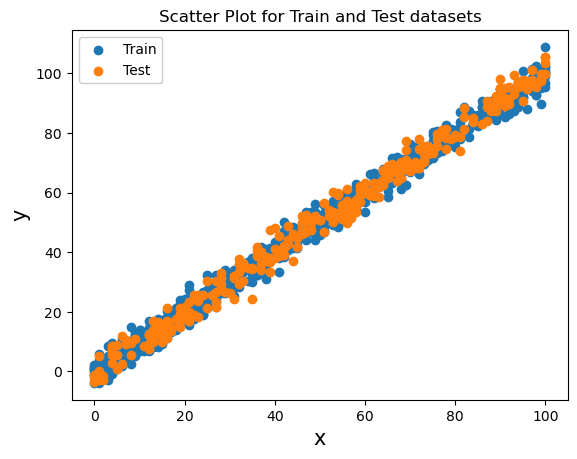

In [12]:
plt.scatter((dt1b['x']),dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

We retrieve the independent(x) and dependent(y) variables and since we have only one feature(x) 
we reshape them so that we could feed them into our linear regression model.

In [13]:
x_train = dt1b['x']
y_train = dt1b['y']
x_test = dt1t['x']
y_test = dt1t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

Fit model and get the intercept and coefficent

In [14]:
# fit model
reg = LinearRegression() # normalize does not exist, not using normalize is ok, same results,
reg.fit(x_train, y_train)

# predict
y_pred = reg.predict(x_test)
print('predicted R^2 :', r2_score(y_test, y_pred))
print('predicted MSE :', mean_squared_error(y_test,y_pred))

predicted R^2 : 0.9888014444327563
predicted MSE : 9.432922192039305


In [15]:
print("intercept: {}".format(reg.intercept_))
print("coeffcient: {}".format(reg.coef_))

intercept: -0.10726546430097272
coeffcient: [1.00065638]


Hence the fitted line : `y = -0.10726546430095851 + 1.00065638*x`

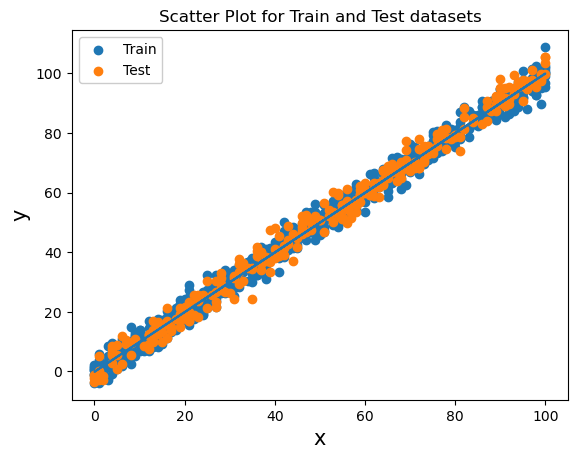

In [16]:
plt.scatter(dt1b['x'],dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(dt1b['x'], (reg.intercept_ + reg.coef_[0] * dt1b['x']))

How about build sample residual?

In [17]:
y_pred_b = reg.predict(x_train)
residuals = y_train - y_pred_b

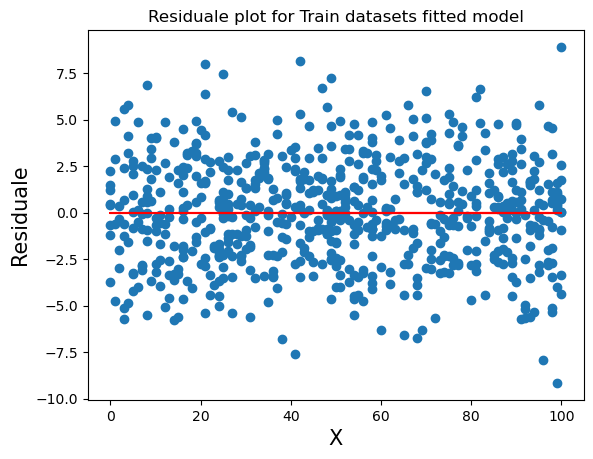

In [18]:
plt.scatter((dt1b['x']),residuals)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(dt1b['x'], 0 * dt1b['x'], color="r") 
# why this line? suggests that the variances of the error terms are equal throughout dataset

Residule distributed around zero randomly, the model fit is adequate 

# Practice 2 - Use "train2.csv" and "test2.csv" build simple linear model, did you observe any special trends? How to improve the model fit

Below code give a initial scripts to look into data, 
please take sometime following majority steps of practice 1 to tackle this problem 

**Improvement idea: polynomial regression?**

In [19]:
print("Train data size: {}".format(dt2b.shape))
print("Test data size: {}".format(dt2t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [20]:
dt2b.head()

,x,y
0,576.0,21.549452
1,2500.0,47.464463
2,225.0,17.218656
3,1444.0,36.586398
4,7569.0,87.288984


In [21]:
dt2t.head()

,x,y
0,5929,79.775152
1,441,23.177279
2,484,25.609262
3,400,17.857388
4,1296,41.849864


In [22]:
dt2b.describe()

,x,y
count,7.000000e+02,699.000000
mean,2.113670e+04,49.939869
std,4.709034e+05,29.109217
min,0.000000e+00,-3.839981
25%,6.250000e+02,24.929968
50%,2.401000e+03,48.973020
75%,5.625000e+03,74.929911
max,1.246201e+07,108.871618


In [23]:
dt2t.describe()

,x,y
count,300.000000,300.000000
mean,3404.330000,51.205051
std,2996.644856,29.071481
min,0.000000,-3.467884
25%,729.000000,25.676502
50%,2809.000000,52.170557
75%,5329.000000,74.303007
max,10000.000000,105.591837


In [24]:
print("Train data misscnt: {}".format(dt2b.isnull().sum()))
print("Test data misscnt: {}".format(dt2t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


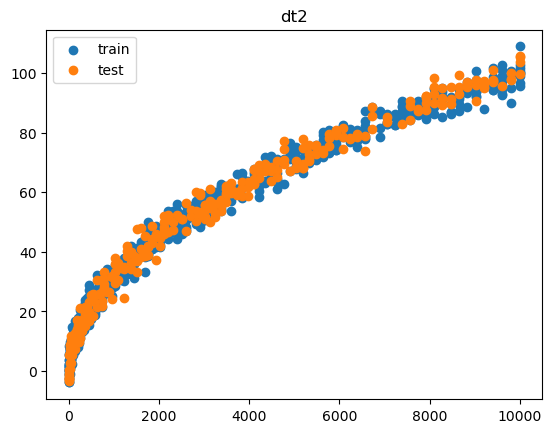

In [25]:
dt2b = dt2b.dropna().copy()
plt.scatter(dt2b['x'],dt2b['y'], label='train')
plt.scatter(dt2t['x'],dt2t['y'], label='test')
plt.legend()
plt.title('dt2')
plt.show()

# log trend?

In [26]:
# fit model
reg2 = LinearRegression()
reg2.fit(np.array(dt2b['x']).reshape(-1,1),np.array(dt2b['y']).reshape(-1,1))

y_pred_dt2 = reg.predict(np.array(dt2t['x']).reshape(-1,1))
print('predicted R^2 :', r2_score(np.array(dt2t['y']).reshape(-1,1), y_pred_dt2)) # R^2 very low
print('predicted MSE :', mean_squared_error(np.array(dt2t['y']).reshape(-1,1), y_pred_dt2))

predicted R^2 : -23805.498843137608
predicted MSE : 20053019.32947975


In [27]:
print("intercept: {}".format(reg2.intercept_))
print("coeffcient: {}".format(reg2.coef_))

intercept: [19.29393564]
coeffcient: [[0.00917928]]


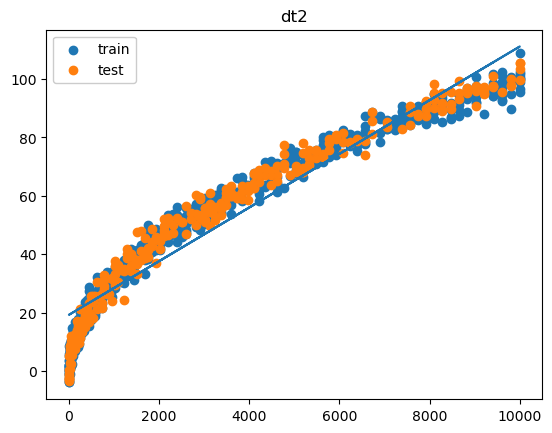

In [45]:
plt.scatter(dt2b['x'],dt2b['y'], label='train')
plt.scatter(dt2t['x'],dt2t['y'], label='test')
plt.legend(framealpha=1, frameon=True)
plt.plot(dt2b['x'], (reg2.intercept_ + reg2.coef_[0] * dt2b['x'])) 
plt.title('dt2')
plt.show()

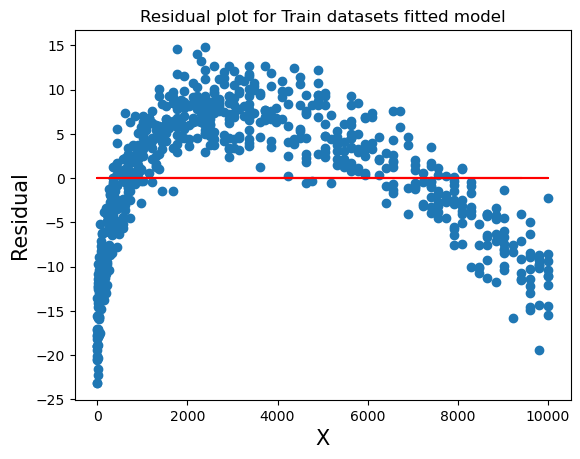

In [29]:
y_pred_dt2_trn = reg2.predict(np.array(dt2b['x']).reshape(-1,1))
residuals_dt2 = np.array(dt2b['y']).reshape(-1,1)- y_pred_dt2_trn 

plt.scatter(np.array(dt2b['x']).reshape(-1,1),residuals_dt2)
plt.title("Residual plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residual", fontsize=15)
plt.plot(dt2b['x'], 0 * dt2b['x'], color="r") # variance imbalance biased and homoscedastic

# Practice 3 - Use "train3.csv" and "test3.csv" build simple linear model, did you observe any special trends? How to improve the model fit

In [30]:
print("Train data size: {}".format(dt3b.shape))
print("Test data size: {}".format(dt3t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [31]:
dt3b.head()

,x,y
0,24.0,464.378880
1,50.0,2252.875253
2,15.0,296.482126
3,38.0,1338.564521
4,87.0,7619.366709


In [32]:
dt3t.head()

,x,y
0,77,6364.074878
1,21,537.186256
2,22,655.834278
3,20,318.886311
4,36,1751.411149


In [33]:
dt3b.describe() # missing 1 record y

,x,y
count,700.000000,699.000000
mean,54.985939,3340.124826
std,134.681703,3055.712556
min,0.000000,0.014850
25%,25.000000,621.515765
50%,49.000000,2398.356724
75%,75.000000,5614.501316
max,3530.157369,11853.029271


In [34]:
dt3t.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,3464.291087
std,28.504286,3082.356336
min,0.000000,0.075794
25%,27.000000,659.283348
50%,53.000000,2721.780348
75%,73.000000,5520.944197
max,100.000000,11149.636147


Text(0, 0.5, 'y')

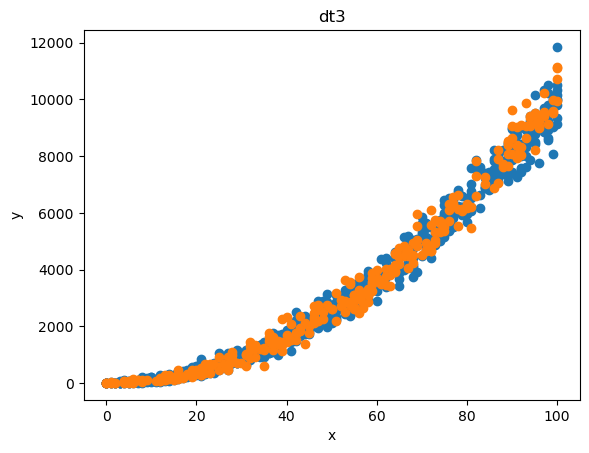

In [35]:
dt3b = dt3b.dropna().copy()
plt.scatter(dt3b['x'],dt3b['y'], label='train')
plt.scatter(dt3t['x'],dt3t['y'], label='test')
plt.title('dt3')
plt.xlabel('x')
plt.ylabel('y')
# nonlinear, exponential

In [36]:
reg3 = LinearRegression()
reg3.fit(np.array(dt3b['x']).reshape(-1,1),np.array(dt3b['y']).reshape(-1,1))

y_pred_3 = reg3.predict(np.array(dt3t['x']).reshape(-1,1))
print('predicted R^2 :', r2_score(np.array(dt3t['y']).reshape(-1,1), y_pred_3))
print('predicted MSE :', mean_squared_error(np.array(dt3t['y']).reshape(-1,1),y_pred_3))
print("intercept: {}".format(reg3.intercept_))
print("coeffcient: {}".format(reg3.coef_))

predicted R^2 : 0.9204524642903842
predicted MSE : 753255.5700480756
intercept: [-1743.24128674]
coeffcient: [[101.63824122]]


Text(0, 0.5, 'y')

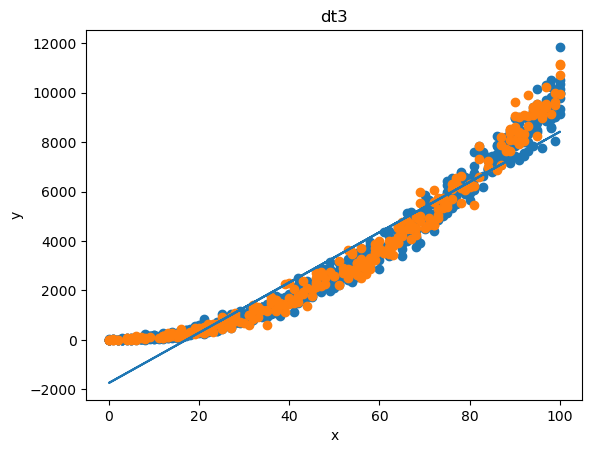

In [37]:
plt.scatter(dt3b['x'],dt3b['y'], label='train')
plt.scatter(dt3t['x'],dt3t['y'], label='test')
plt.plot(dt3b['x'], (reg3.intercept_ + reg3.coef_[0] * dt3b['x'])) 
plt.title('dt3')
plt.xlabel('x')
plt.ylabel('y')

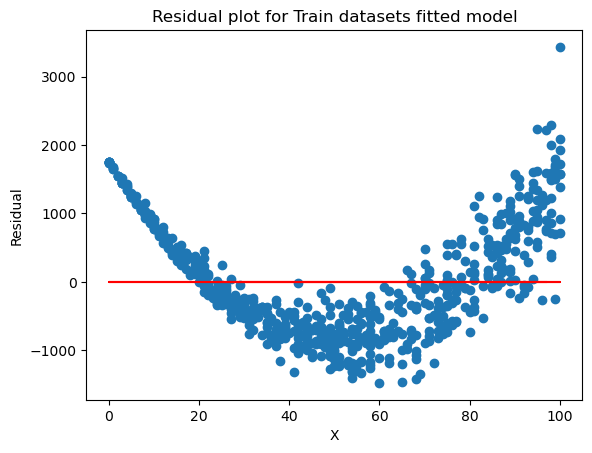

In [38]:
y_pred_3_trn = reg3.predict(np.array(dt3b['x']).reshape(-1,1))
residual_3 = np.array(dt3b['y']).reshape(-1,1)-y_pred_3_trn

plt.scatter(np.array(dt3b['x']).reshape(-1,1),residual_3)
plt.title("Residual plot for Train datasets fitted model")
plt.xlabel("X")
plt.ylabel("Residual")
plt.plot(dt3b['x'], 0 * dt3b['x'], color="r") # why this line?
#biased and heteroskesdastic 

# Practice 4 - Can you implement simple linear regression model in practice1 from scratch using gradient descent?
# This is your homework

In [39]:
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


In [40]:
x_train = dt1b['x']
y_train = dt1b['y']
x_test = dt1t['x']
y_test = dt1t['y']

x_train = np.array(x_train).reshape(699,1)
y_train = np.array(y_train).reshape(699,1)
x_test = np.array(x_test).reshape(300,1)
y_test = np.array(y_test).reshape(300,1)

### Train steps:
#### 0 - Initiate parameters
#### 1 - Calculate prediction based on temp parameters and equation 
#### 2 - Calc. cost
#### 3 - Calc. Gradient
#### 4 - Update Parameter
#### 5 - Repeat steps 1-4 for n iterations to until converge to min cost
#### 6 - End loop before n iterations if minimal is alrrady reached

### Building block functions (Only put two you need to finish the rest)

In [41]:
# initiate parameters
def get_pred(x_train, parameters):
    b1 = parameters['b1']
    b0 = parameters['b0']
    predictions = np.multiply(b1, x_train) + b0
    return predictions

def cost_function(predictions, y_train):
    cost = np.mean((y_train - predictions) ** 2) * 0.5
    return cost

def deriv(x_train, y_train, predictions): # derivatives of both ba and b0
    #### code up your solution here ######
    from sympy import symbols, diff
    x_train = symbols('x_train')
    f =  np.mean((y_train - predictions) ** 2) * 0.5
    derivatives = diff(f, x_train)
    
    return derivatives


def update_parameters(parameters, derivatives, learning_rate): # both b0 and b1 
    #### code up your solution here ######
    parameters = parameters - derivatives * learning_rate
    return parameters

In [ ]:
# answer
def get_pred(x_train, parameters):
    b1 = parameters['b1']
    b0 = parameters['b0']
    predictions = np.multiply(b1, x_train) + b0
    return predictions

def cost_function(predictions, y_train):
    cost = np.mean((y_train - predictions) ** 2) * 0.5
    return cost

def deriv(x_train, y_train, predictions):
    derivatives = dict()
    df = (y_train - predictions) * -1
    db1 = np.mean(np.multiply(x_train, df))
    db0 = np.mean(df)
    derivatives['db1'] = db1
    derivatives['db0'] = db0
    return derivatives

def update_parameters(parameters, derivatives, learning_rate):
    parameters['b1'] = parameters['b1'] - learning_rate * derivatives['db1']
    parameters['b0'] = parameters['b0'] - learning_rate * derivatives['db0']
    return parameters

### Build training function

In [42]:
def train(x_train, y_train, learning_rate, iters = 5):
    # random initialization of parameters
    parameters = dict()
    parameters["b1"] = np.random.uniform(0,1) * -1
    parameters["b0"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    # loss
    loss = list()
    
    # iterate
    for i in range(iters):
        
        # Prediction
        #### code up your solution here ######
        predictions = parameters["b1"]*x_train + parameters["b0"] 
        
        # cost function
        #### code up your solution here ######
        cost = np.mean((y_train - predictions) ** 2) * 0.5
        
        # append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        # plot function
        plt.plot(x_train, y_train, 'x')
        plt.plot(x_train, predictions, 'o')
        
        # Calc. gradient/derivatives
        #### code up your solution here ######
        
        # update parameters
        #### code up your solution here ######
        
    return parameters, loss

In [ ]:
# answer
def train(x_train, y_train, learning_rate, iters = 10):
    #random parameters
    parameters = dict()
    parameters["b1"] = np.random.uniform(0,1) * -1
    parameters["b0"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #predition
        predictions = get_pred(x_train, parameters)
        
        #cost function
        cost = cost_function(predictions, y_train)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        plt.plot(x_train, y_train, 'x')
        plt.plot(x_train, predictions, 'o')
        plt.show()
        
        #gradeint/partial derivatives
        derivatives = deriv(x_train, y_train, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

### Traing model with your function by gradient descent algrithm

In [43]:
parameters,loss = train(x_train, y_train, learning_rate, iters)

NameError: name 'learning_rate' is not defined

### Print your final fitted model/ validate model on test data set

In [ ]:
# answer 
parameters,loss = train(x_train, y_train, 0.0001, 20)
print("Fitted Model: Y = {} + {} * X".format(parameters["b0"], parameters["b1"]))

In [ ]:
# answer 
valid_predictions = get_pred(x_test, parameters)
plt.figure()
plt.plot(x_test, y_test, 'x', label='fitted')
plt.plot(x_test, valid_predictions, 'o', label='actual')
plt.legend()